## Data Visualization

### Import libraries

In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [3]:
df = pd.read_csv("Preprocessed_Data.csv")

In [4]:
df.shape

(1632, 24)

In [5]:
df.head()

,Age Group,Garment Length,Presentation Product Type,Sleeve Length,category,Acrylic,Cotton,Elastane,Elastodiene,Elastomultiester,...,Polyamide,Polyester,Polystyrene,Polyurethane,Silk,Viscose,Wool,copolyester,metallised,price
0,Baby,Short,Swimsuit,Long sleeve,Boy,0.0,0.0,17.0,0.0,0.0,...,0.0,83.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1999.0
1,Baby,Regular,T-shirt,Short sleeve,Boy,0.0,100.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,449.0
2,Baby,Regular,Bodysuit,Long sleeve,Boy,0.0,100.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,399.0
3,Baby,Short,Shorts,No sleeve,Boy,0.0,99.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,649.0
4,Baby,Long,Pyjamas,Long sleeve,Boy,0.0,100.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1099.0


### Price Distribution

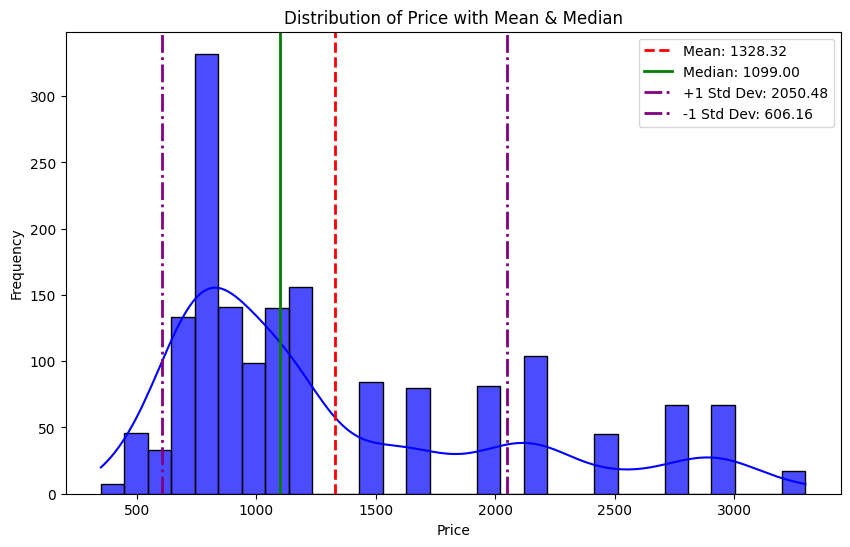

In [7]:
plt.figure(figsize=(10, 6))

# Plot histogram with KDE
sns.histplot(df['price'], bins=30, kde=True, color='blue', edgecolor='black', alpha=0.7)

# Calculate statistics
mean_price = df['price'].mean()
median_price = df['price'].median()
std_price = df['price'].std()

# Add vertical lines for key statistics
plt.axvline(mean_price, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_price:.2f}')
plt.axvline(median_price, color='green', linestyle='-', linewidth=2, label=f'Median: {median_price:.2f}')
plt.axvline(mean_price + std_price, color='purple', linestyle='-.', linewidth=2, label=f'+1 Std Dev: {(mean_price + std_price):.2f}')
plt.axvline(mean_price - std_price, color='purple', linestyle='-.', linewidth=2, label=f'-1 Std Dev: {(mean_price - std_price):.2f}')

# Labels & title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price with Mean & Median')
plt.legend()
plt.show()

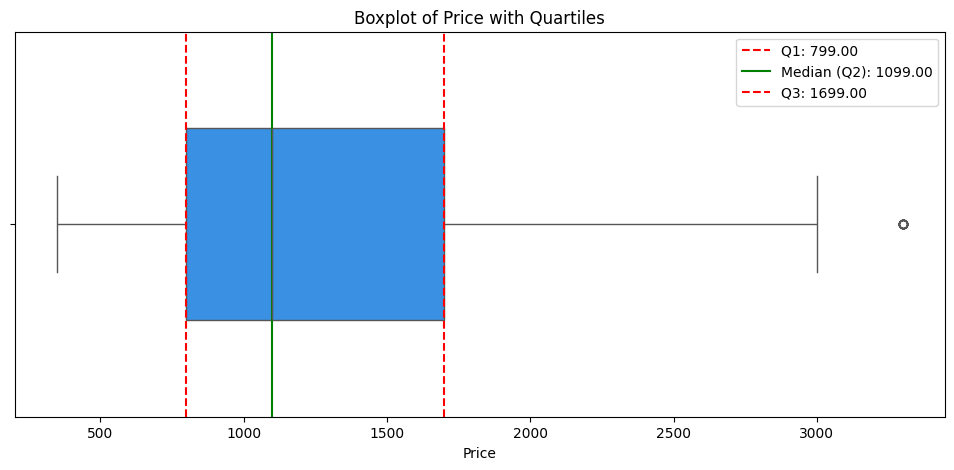

In [8]:
plt.figure(figsize=(12, 5))

sns.boxplot(x=df['price'], color='dodgerblue', width=0.5)

# Extract quartile values
q1 = df['price'].quantile(0.25)
q2 = df['price'].median()
q3 = df['price'].quantile(0.75)

# Annotate quartiles
plt.axvline(q1, color='r', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='g', linestyle='-', label=f'Median (Q2): {q2:.2f}')
plt.axvline(q3, color='r', linestyle='--', label=f'Q3: {q3:.2f}')

# Display values on the plot
plt.legend()
plt.title("Boxplot of Price with Quartiles")
plt.xlabel("Price")
plt.show()

### Univariant Analysis

C:\Users\Cyber\AppData\Local\Temp\ipykernel_16812\3929059851.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


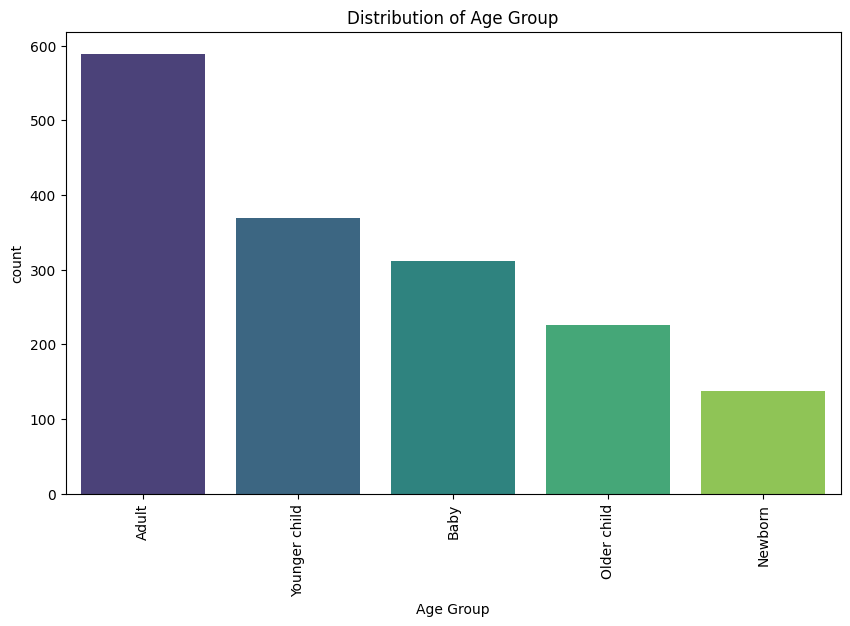

C:\Users\Cyber\AppData\Local\Temp\ipykernel_16812\3929059851.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


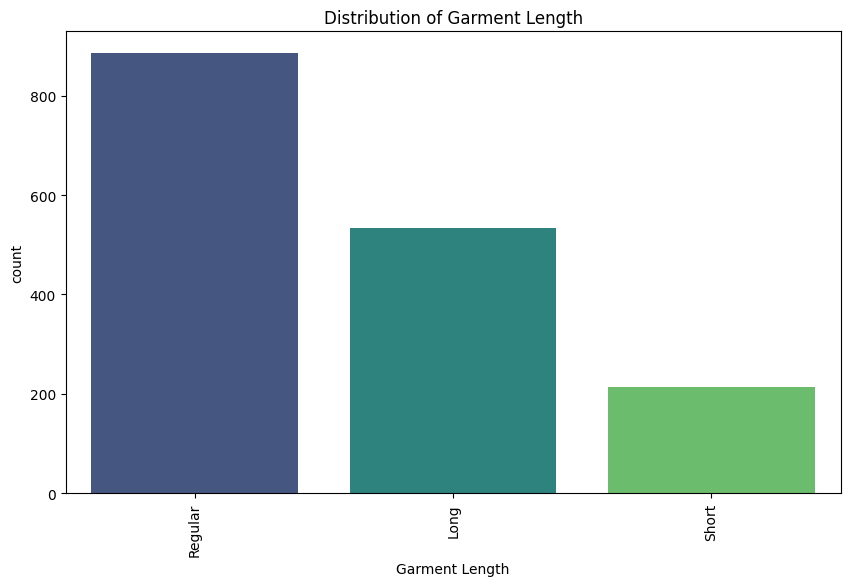

C:\Users\Cyber\AppData\Local\Temp\ipykernel_16812\3929059851.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


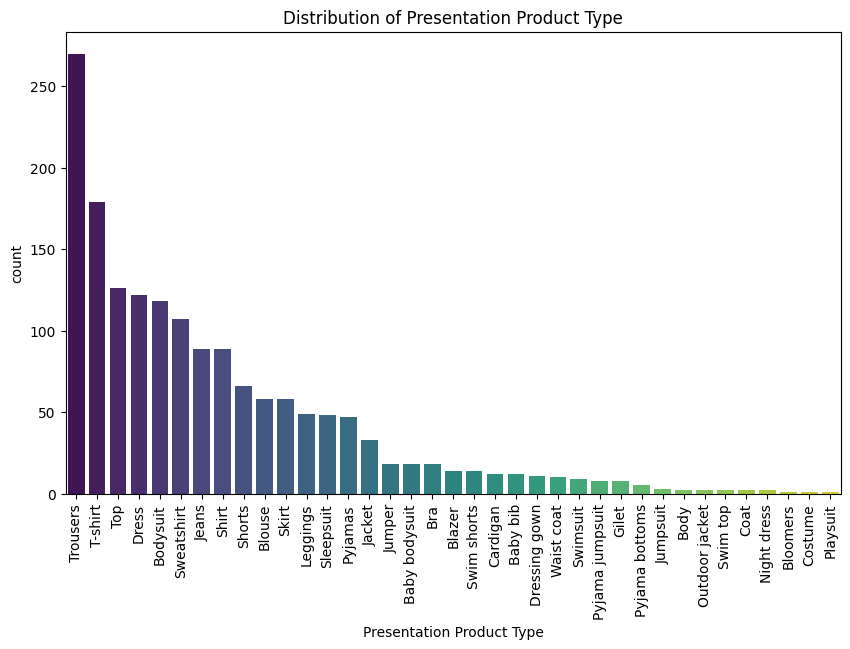

C:\Users\Cyber\AppData\Local\Temp\ipykernel_16812\3929059851.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


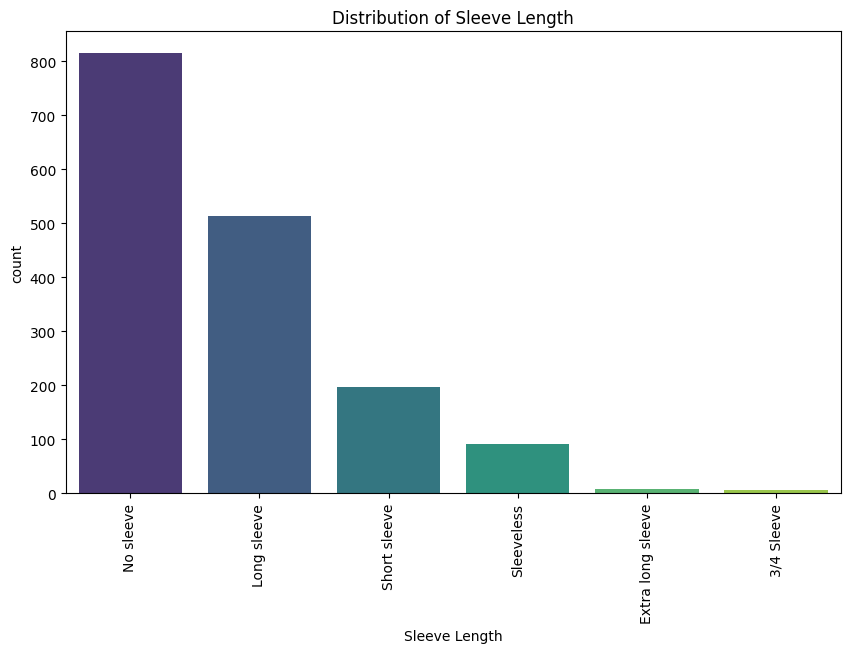

C:\Users\Cyber\AppData\Local\Temp\ipykernel_16812\3929059851.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


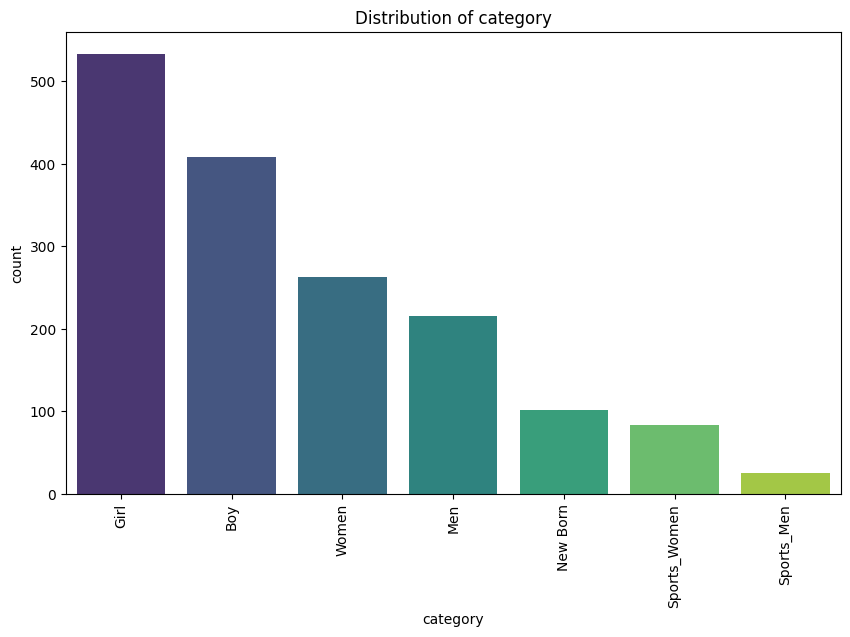

In [9]:
for col in df.select_dtypes('object').columns:
    plt.figure(figsize=(10, 6))
    plt.xticks(rotation=90)
    
    # Get sorted order based on frequency
    order = df[col].value_counts().index  
    
    # Create count plot with color variation
    sns.countplot(data=df, x=col, order=order, palette='viridis')  
    
    plt.title(f"Distribution of {col}")
    plt.show()

### Bivariant Analysis

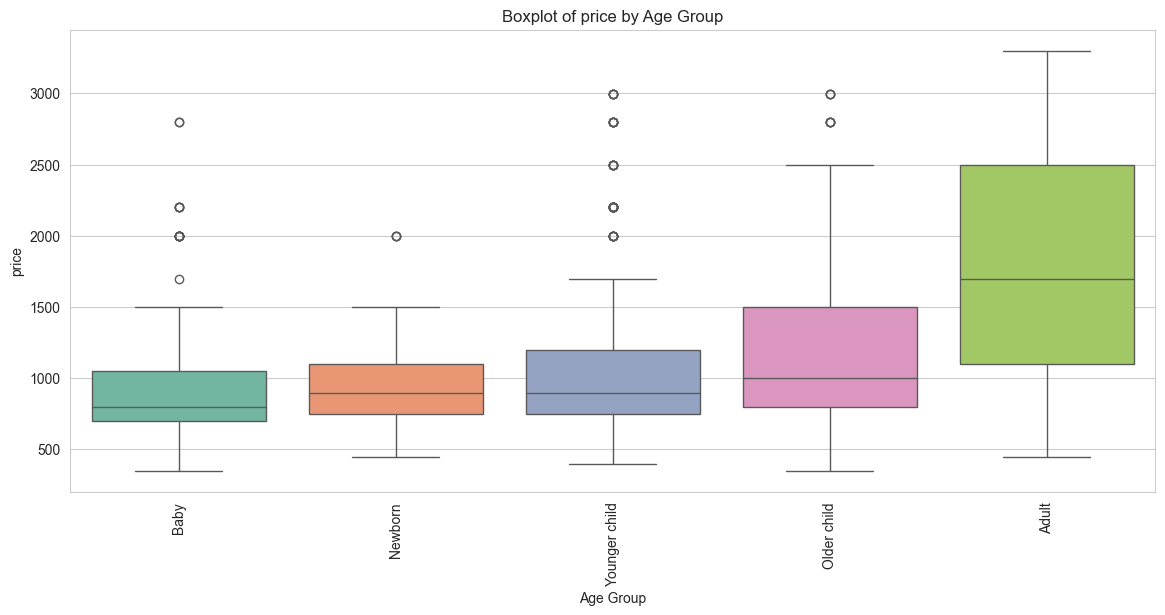

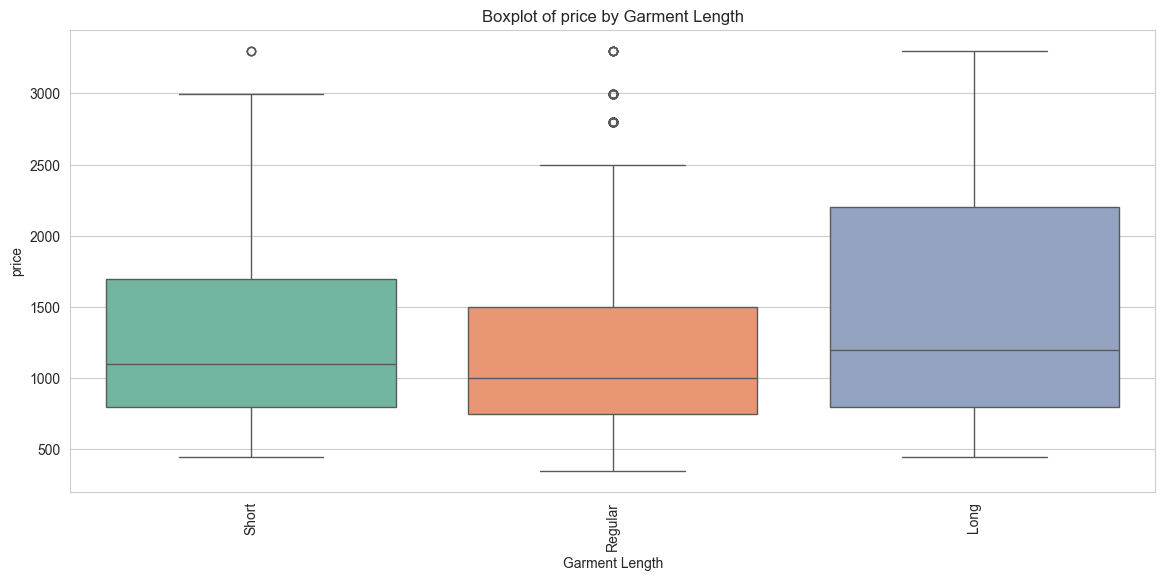

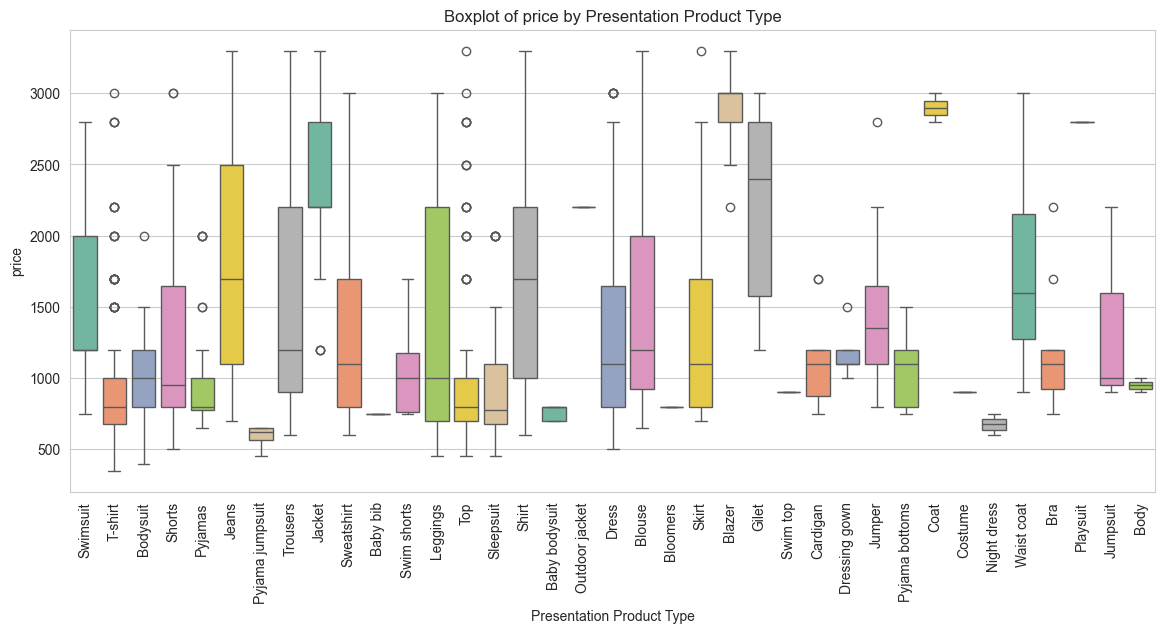

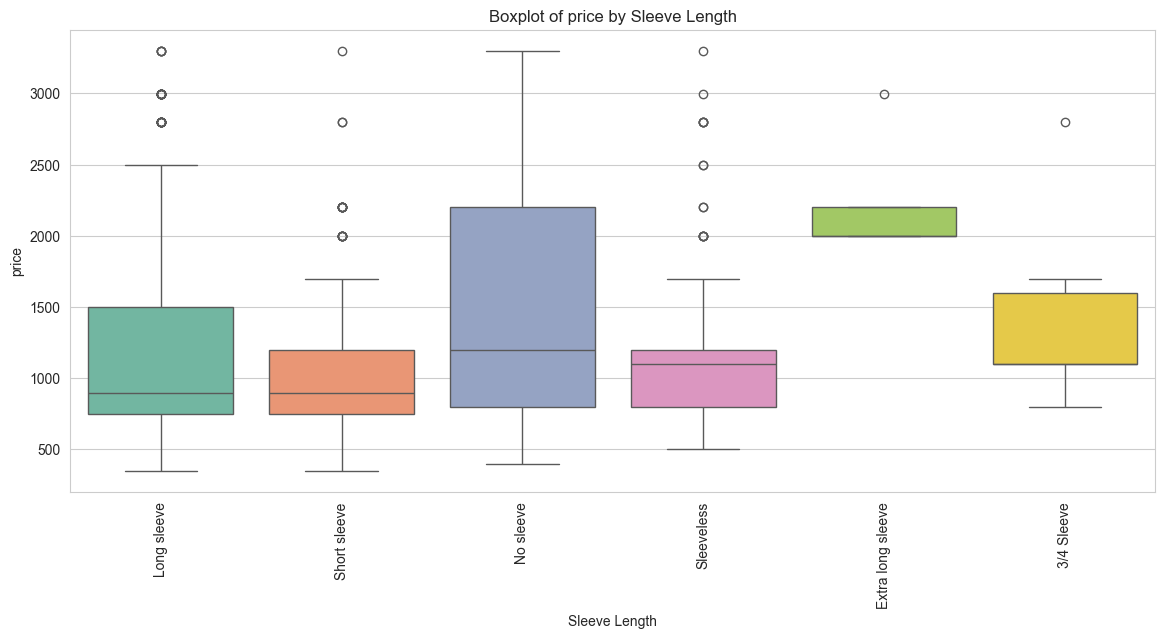

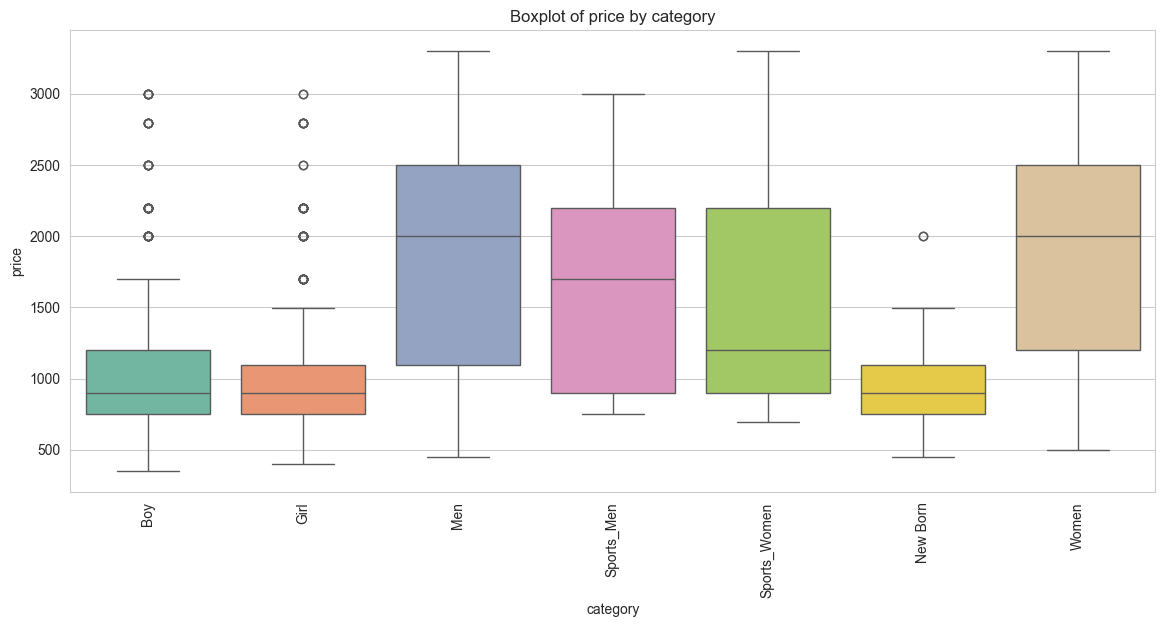

In [10]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
target_column = 'price'

# Set seaborn style for better visuals
sns.set_style("whitegrid")
palette = sns.color_palette("coolwarm", len(df[target_column].unique())) 

# Loop through each categorical variable
for col in categorical_columns:

    # Boxplot
    plt.figure(figsize=(14, 6))
    sns.boxplot(x=df[col], y=df[target_column], hue=df[col], palette="Set2", legend=False)
    plt.title(f"Boxplot of {target_column} by {col}")
    plt.xticks(rotation=90)
    plt.show()

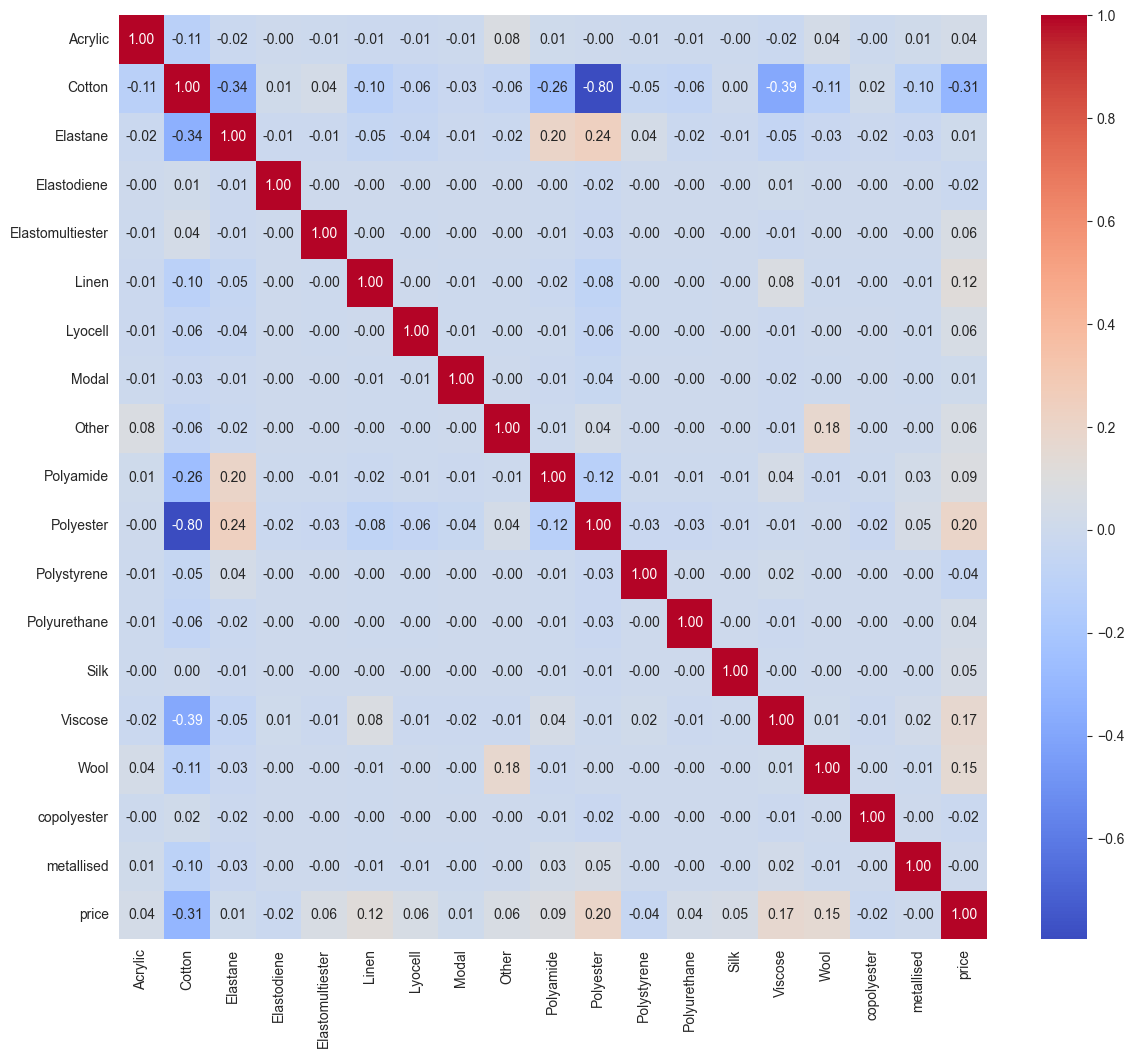

In [11]:
# Heatmap for numerical features
num_df = df.select_dtypes(include="number")

plt.figure(figsize=(14, 12))
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

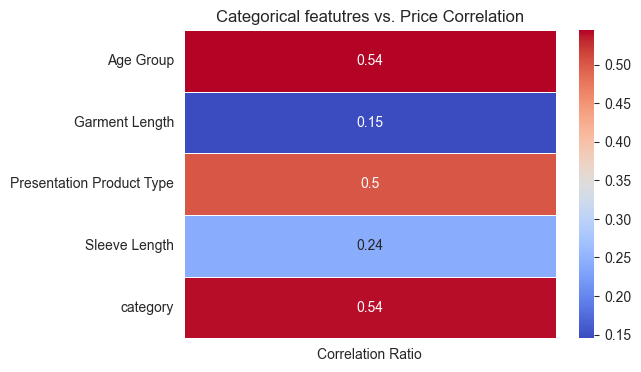

In [12]:
# Heatmap for categorical features

# Define correlation ratio function
def correlation_ratio(categories, values):
    """Computes the correlation ratio (η²) between categorical and numerical variables."""
    category_means = values.groupby(categories).mean()
    total_mean = values.mean()
    ss_between = sum(values.groupby(categories).count() * (category_means - total_mean) ** 2)
    ss_total = sum((values - total_mean) ** 2)
    return np.sqrt(ss_between / ss_total) if ss_total != 0 else 0

# Find categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

target_column = 'price'

# Compute correlation ratios
corr_data = {col: correlation_ratio(df[col], df[target_column]) for col in categorical_columns}
corr_df = pd.DataFrame.from_dict(corr_data, orient='index', columns=['Correlation Ratio'])

# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Categorical featutres vs. Price Correlation")
plt.show()

### Multivariant Analysis

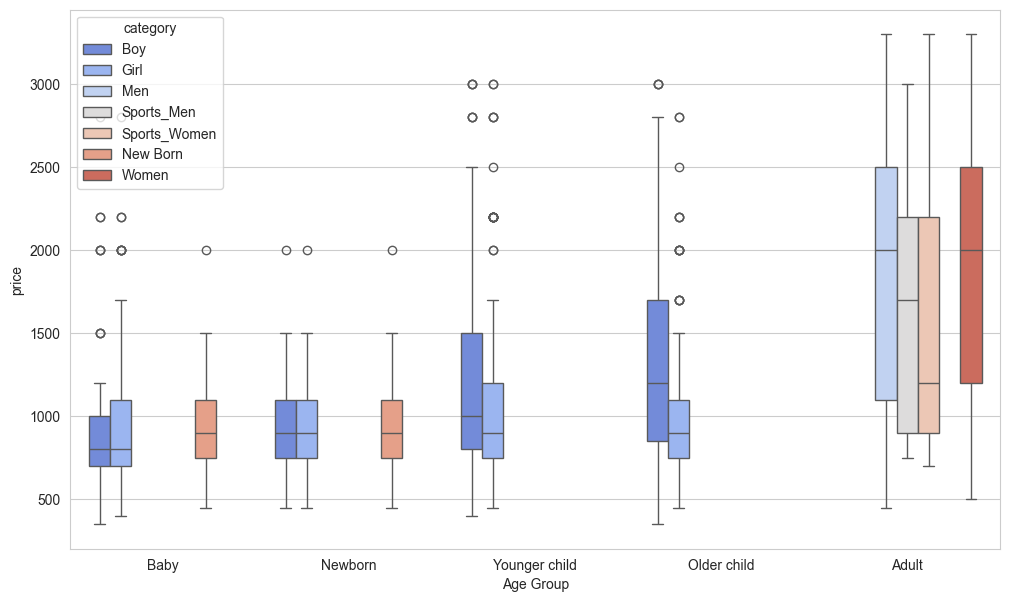

In [ ]:

plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x="Age Group", y="price", hue="category", palette="coolwarm")
plt.show()
